#### Logistic Regression

- Reminder

  
- Computing Hypothesis(가설)


- Computing Cost Function(손실 함수)


- Evaluation(평가)


- Higher Implementation

##### Reminder

- Hypothesis

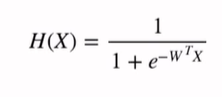

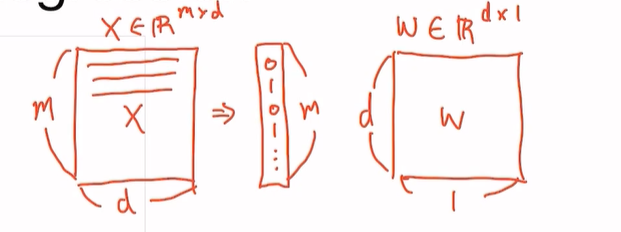

- x = 1이 되는 경우를 찾는 것이 목표입니다.

<br>

- Cost

   - y = H(x), cost is near 0.
   
   - y /= H(x), cost is high.
   
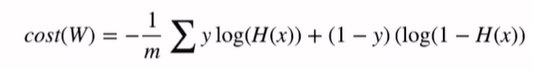

<br>

- Weight Update via GD

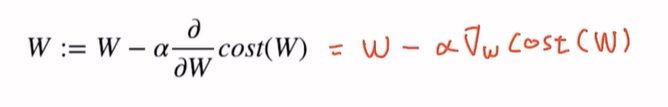




In [1]:
! pip install torchvision

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
#Imports

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [4]:
torch.manual_seed(1)

In [5]:
#Training Data

x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]

In [6]:
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [7]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


##### Computing the Hypothesis

torch.exp()함수를 이용하여 H(x)표현

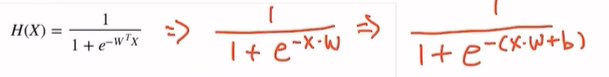

In [9]:
print('e^1 equals: ', torch.exp(torch.FloatTensor([1])))

e^1 equals:  tensor([2.7183])


In [10]:
#compute

W = torch.zeros((2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)


In [11]:
#지수함수

hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W) + b)))

In [12]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


In [13]:
#시그모이드 함수(Compute)

print('1/(1+e^{-1}) equals: ', torch.sigmoid(torch.FloatTensor([1])))

1/(1+e^{-1}) equals:  tensor([0.7311])


In [14]:
hypothesis = torch.sigmoid(x_train.matmul(W) + b)#x * w

In [15]:
print(hypothesis)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)


In [16]:
print(hypothesis.shape)

torch.Size([6, 1])


##### Computing the Cost Function

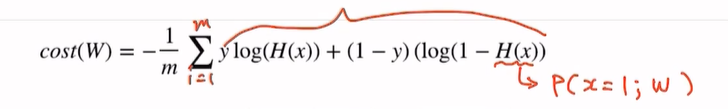

difference between hypothesis and y_train

In [17]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [18]:
#one element(log)

-(y_train[0] * torch.log(hypothesis[0]) + 
  (1 - y_train[0]) * torch.log(1 - hypothesis[0]))

tensor([0.6931], grad_fn=<NegBackward>)

In [19]:
losses = -(y_train * torch.log(hypothesis) + 
  (1 - y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward>)


In [20]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


In [21]:
F.binary_cross_entropy(hypothesis, y_train)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward>)

##### Whole Training Procedure

In [22]:
#모델 초기화

w = torch.zeros((2, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

#optimizer 설정

optimizer = torch.optim.SGD([w,b], lr=1)

nb_epochs = 1000

for epoch in range(nb_epochs + 1):
    
    #Cost 계산
    
    hypothesis = torch.sigmoid(x_train.matmul(w) + b) # or .mm or @
    cost = F.binary_cross_entropy(hypothesis, y_train)
    
    #Cost로 H(x) 개선
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 200번마다 로그 출력
    
    if epoch % 200 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))
        
        

Epoch    0/1000 Cost: 0.693147
Epoch  200/1000 Cost: 0.080643
Epoch  400/1000 Cost: 0.045300
Epoch  600/1000 Cost: 0.031672
Epoch  800/1000 Cost: 0.024394
Epoch 1000/1000 Cost: 0.019852


##### Evaluation



In [24]:
#the trained the model

hypothesis = torch.sigmoid(x_train.matmul(w) +  b)
print(hypothesis[:5])

tensor([[2.7648e-04],
        [3.1608e-02],
        [3.8977e-02],
        [9.5622e-01],
        [9.9823e-01]], grad_fn=<SliceBackward>)


In [27]:
#hypothesis(real number[0,1], binary predictions[0 or 1]

prediction = hypothesis >= torch.FloatTensor([0.5])
print(prediction[:5])
print(y_train[:5])
#True:1 , False:0

tensor([[False],
        [False],
        [False],
        [ True],
        [ True]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.]])


In [28]:
correct_prediction = prediction.float() == y_train
print(correct_prediction[:5])

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


##### Higher Implementation with Class



In [29]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        
        super().__init__()
        self.linear = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        return self.sigmoid(self.linear(x))
    

In [30]:
model = BinaryClassifier()

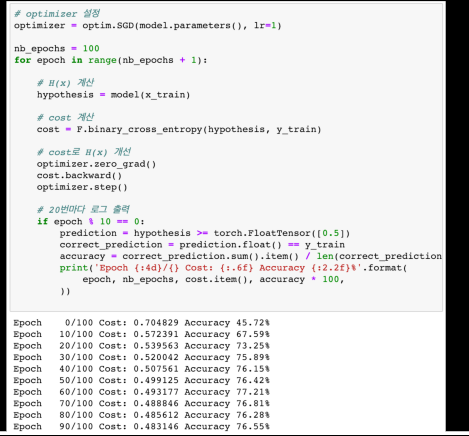